In [1]:
import pandas as pd

#Copy path of both dataset
file_path = "C:\\RAG_myhome\\Rahoo Intern Task\\data.csv"

#Load th usingpd.read_csv
df = pd.read_csv(file_path)

#Find out which columns have null values and how much
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16644 entries, 0 to 16643
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    16644 non-null  object 
 1   date                  16644 non-null  object 
 2   warehouse_ID          16644 non-null  object 
 3   Latitude              16312 non-null  float64
 4   Longitude             16228 non-null  float64
 5   Product_Type          16644 non-null  object 
 6   year                  16644 non-null  int64  
 7   month                 16644 non-null  object 
 8   is_weekend            16145 non-null  object 
 9   is_warehouse_closed   16478 non-null  object 
 10  daily_dispatch_count  16644 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.4+ MB


In [2]:
#Display starting of dataset
df.head(5)

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count
0,0x2710,01-01-2017,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,5.5
1,0x33e6,01-01-2017,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,Yes,No,6.1
2,0x2711,02-01-2017,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,4.8
3,0x33e7,02-01-2017,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,No,6.7
4,0x2712,03-01-2017,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,5.8


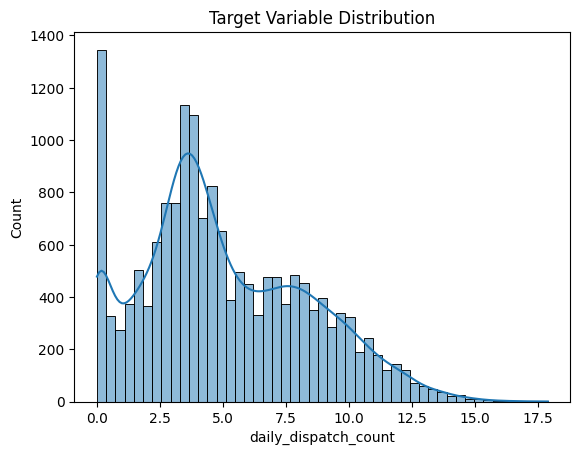

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df["daily_dispatch_count"], kde=True)
plt.title("Target Variable Distribution")
plt.show()

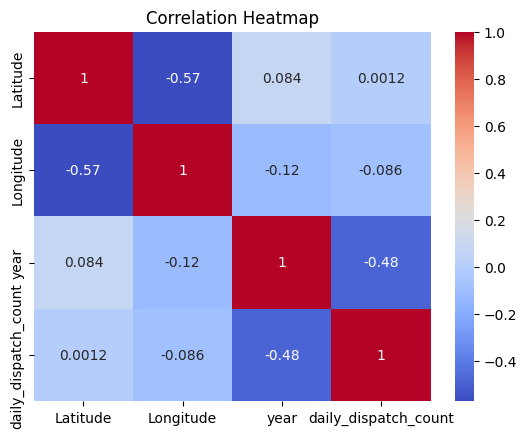

In [4]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

correlation = df[num_cols].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

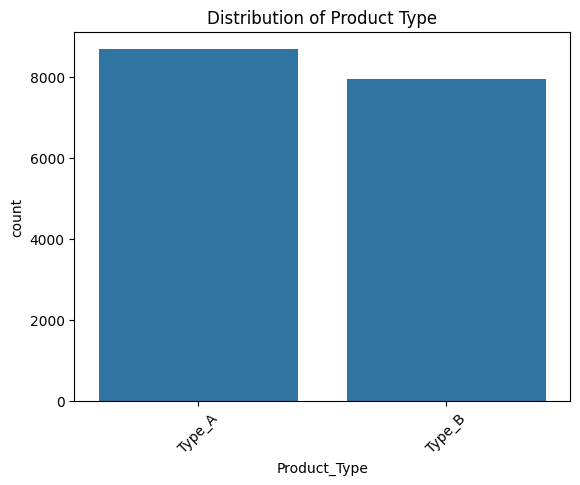

In [5]:
#Distribution if the two prooduct types
sns.countplot(data=df, x="Product_Type")
plt.title(f"Distribution of Product Type")
plt.xticks(rotation=45)
plt.show()

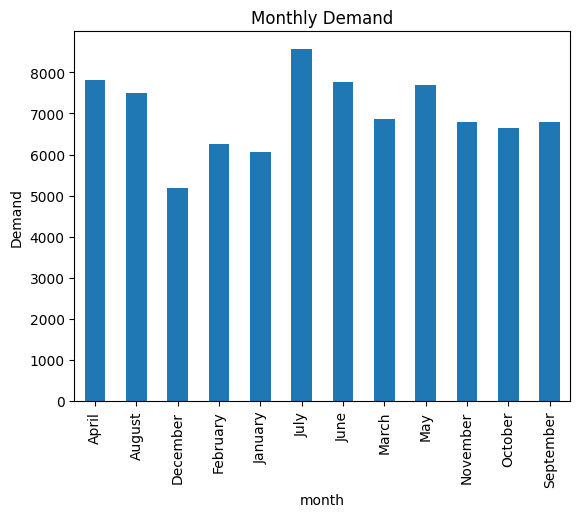

In [6]:
monthly_demand = df.groupby("month")["daily_dispatch_count"].sum()
monthly_demand.plot(kind="bar", title="Monthly Demand")
plt.ylabel("Demand")
plt.show()

In [7]:
#Copy dataset so that changes are not made on original
df_copy = df.copy()

#Seperate features and targets
X = df_copy.drop(columns=["daily_dispatch_count"])  # Exclude target
y = df_copy["daily_dispatch_count"]

X,y

(           ID        date warehouse_ID   Latitude   Longitude Product_Type  \
 0      0x2710  01-01-2017     WH_0x3e9  41.681471  -72.794746       Type_A   
 1      0x33e6  01-01-2017     WH_0x3ea  38.749077 -105.183060       Type_A   
 2      0x2711  02-01-2017     WH_0x3e9  41.681471  -72.794746       Type_A   
 3      0x33e7  02-01-2017     WH_0x3ea  38.749077 -105.183060       Type_A   
 4      0x2712  03-01-2017     WH_0x3e9  41.681471  -72.794746       Type_A   
 ...       ...         ...          ...        ...         ...          ...   
 16639  0x6f53  30-04-2021     WH_0x3f0  37.915825  -89.829262       Type_B   
 16640  0x74c8  30-04-2021     WH_0x3f1  48.692551 -116.319862       Type_A   
 16641  0x74c9  30-04-2021     WH_0x3f1  48.692551 -116.319862       Type_B   
 16642  0x794c  30-04-2021     WH_0x3f2  61.600803 -149.125259       Type_A   
 16643  0x794d  30-04-2021     WH_0x3f2  61.600803 -149.125259       Type_B   
 
        year    month is_weekend is_warehouse_clos

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11650, 10), (4994, 10), (11650,), (4994,))

In [9]:
#Seperate numberical and categorical columns for preprocessing
num_cols = ["Latitude", "Longitude", "year"]
cat_cols = ["warehouse_ID", "Product_Type", "month", "is_weekend", "is_warehouse_closed"]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Impute the missing values for numerical columns using mean strategy and then scale
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

#Impute missing values for categorical columns using most_frequent and then encode
from sklearn.preprocessing import OrdinalEncoder
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

#Transform feature matrix
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)

X_train_trans=preprocessor.fit_transform(X_train)
X_test_trans=preprocessor.transform(X_test)
pd.DataFrame(X_train_trans),pd.DataFrame(X_test_trans)

(              0         1         2    3    4     5    6    7
 0      0.535382  1.190840  0.523956  0.0  1.0   3.0  0.0  0.0
 1     -1.026174  0.636807  0.523956  5.0  1.0   9.0  0.0  0.0
 2      0.535382  1.190840 -2.311636  0.0  0.0   1.0  0.0  0.0
 3      0.535382  1.190840 -0.421242  0.0  0.0   6.0  0.0  0.0
 4      0.136926 -0.630255  0.523956  1.0  1.0   0.0  0.0  0.0
 ...         ...       ...       ...  ...  ...   ...  ...  ...
 11645  0.535382  1.190840  0.523956  0.0  0.0   1.0  0.0  0.0
 11646  0.535382  1.190840  0.523956  0.0  0.0  11.0  0.0  0.0
 11647 -1.026174  0.636807 -0.421242  5.0  0.0   5.0  0.0  0.0
 11648  0.136926 -0.630255 -1.366439  1.0  0.0   4.0  0.0  0.0
 11649 -1.026174  0.636807  1.469153  5.0  1.0   7.0  0.0  0.0
 
 [11650 rows x 8 columns],
              0         1         2    3    4    5    6    7
 0     0.535382  1.190840 -1.366439  0.0  1.0  8.0  0.0  0.0
 1    -1.629378  0.769987 -0.421242  4.0  0.0  7.0  1.0  0.0
 2    -1.629378  0.769987 -0.421

In [10]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,StackingRegressor
from sklearn.linear_model import LinearRegression
model1=RandomForestRegressor(random_state=42)
model2=LinearRegression()
gradboost=GradientBoostingRegressor(random_state=42)
#Combine prediction of random forst and linear regression using stacking regressor
stack = StackingRegressor(
    estimators=[("rf", model1), ("lr", model2)],
    final_estimator=gradboost
)
param_grid = {
    "final_estimator__n_estimators": [100, 150],
    "final_estimator__max_depth": [5,7],
    "final_estimator__learning_rate":[0.05,0.01]
}

from sklearn.model_selection import GridSearchCV
# GridSearch with 3-fold cross-validation
grid_search = GridSearchCV(
    estimator=stack,
    param_grid=param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_search.fit(X_train_trans,y_train)

GridSearchCV(cv=3,
             estimator=StackingRegressor(estimators=[('rf',
                                                      RandomForestRegressor(random_state=42)),
                                                     ('lr',
                                                      LinearRegression())],
                                         final_estimator=GradientBoostingRegressor(random_state=42)),
             n_jobs=-1,
             param_grid={'final_estimator__learning_rate': [0.05, 0.01],
                         'final_estimator__max_depth': [5, 7],
                         'final_estimator__n_estimators': [100, 150]},
             scoring='neg_root_mean_squared_error')

In [11]:
#Parameters of best model
grid_search.best_params_

{'final_estimator__learning_rate': 0.05,
 'final_estimator__max_depth': 5,
 'final_estimator__n_estimators': 100}

In [12]:
#Evaluating score of training model
grid_search.best_estimator_.score(X_train_trans,y_train)

0.854007051424033

In [13]:
from sklearn.metrics import r2_score
y_pred=grid_search.best_estimator_.predict(X_test_trans)
#Evaluating score of test model
r2_score(y_test,y_pred)


0.8249827586680142